#### Steps in EDA
	1. Data Ingestion
	2. Perform basic data quality checks
		Missing Value treatment
	3. Perform descriptive statistics
	4. Data Visualization
		Univariate - Single column visualization
			categorical features - Countplot
			continuous features - histogram
		Bivariate - two columns
			continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap
		Multivariate - multiple columns
			correlation plot
			pairplot

##### <b>`NIT Engineering college - EDA NIRF 2024`<b>

Name, Established Year, NIRF, State, Min Cutoff Rank, Max Cutoff Rank, Course Total Fees, Placement Max Package, Placement Avg Package

In [27]:
# Step-1 Data Ingestion
import pandas as pd
df = pd.read_csv('nit-colleges.csv', keep_default_na="")
df.head(3)


,Name,EstablishedYear,NIRF2024Rank,State,Region,TuitionFee4Years2025INR,AvgPackageLPA,MinCutoffRank2025,MaxCutoffRank2025
0,NIT Tiruchirappalli,1964,9,Tamil Nadu,South,479800,21.6,1191,1827
1,NIT Karnataka Surathkal,1960,17,Karnataka,South,450000,20.5,753,1607
2,NIT Rourkela,1961,19,Odisha,East,480000,19.2,0,3156


In [28]:
# Step-2: Data Sanity - Check for duplicates, null
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print("Duplicates Exist.")
    df.drop_duplicates(keep='first').reset_index(drop=True)
    print('Duplicates Removed.')
else:
    print('Duplicates does not exist')

nulls = df.isna().sum()
nulls_cnt = nulls[nulls > 0].sum()
if nulls_cnt > 0:
    print("Nulls does not exist")
else:
    print('Nulls does not exist')

Duplicates does not exist
Nulls does not exist


In [29]:

cat = list(df.columns[df.dtypes == "object"])
cat


['Name', 'State', 'Region']

In [30]:
con = list(df.columns[df.dtypes != "object"])
con

['EstablishedYear',
 'NIRF2024Rank',
 'TuitionFee4Years2025INR',
 'AvgPackageLPA',
 'MinCutoffRank2025',
 'MaxCutoffRank2025']

In [31]:
def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])    
    for col in df.columns:        
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("Missing values replaced")

In [32]:
replacer(df)

Missing values replaced


In [33]:
# Step-3: Perform descriptive statistics
cat

['Name', 'State', 'Region']

In [34]:
con

['EstablishedYear',
 'NIRF2024Rank',
 'TuitionFee4Years2025INR',
 'AvgPackageLPA',
 'MinCutoffRank2025',
 'MaxCutoffRank2025']

In [35]:
df[con].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
EstablishedYear,26.0,1976.58,29.45,1886.0,1960.25,1964.0,2010.00,2010.0
NIRF2024Rank,26.0,35.42,29.98,-1.0,1.50,39.5,59.50,82.0
TuitionFee4Years2025INR,26.0,481862.04,14906.98,450000.0,480000.00,487000.0,489000.00,499923.0
AvgPackageLPA,26.0,11.37,6.04,0.0,6.47,12.7,15.40,21.6
MinCutoffRank2025,26.0,11692.27,12660.95,0.0,2454.75,6253.5,18810.00,32717.0
MaxCutoffRank2025,26.0,15350.00,14759.31,0.0,4751.00,9542.5,23558.75,39594.0


In [36]:
df[cat].describe().T

,count,unique,top,freq
Name,26,26,NIT Tiruchirappalli,1
State,26,26,Tamil Nadu,1
Region,26,6,North,7


(Region
 North        7
 NorthEast    7
 South        5
 East         3
 West         2
 Central      2
 Name: count, dtype: int64,
 <Axes: xlabel='Region'>)

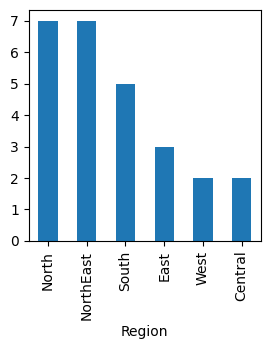

In [48]:
df['Region'].value_counts(), df['Region'].value_counts().plot(kind='bar', figsize=(3,3))

In [40]:
df['Name'].head(3).value_counts()

Name
NIT Tiruchirappalli        1
NIT Karnataka Surathkal    1
NIT Rourkela               1
Name: count, dtype: int64

In [41]:
df['State'].tail(3).value_counts()

State
Mizoram     1
Manipur     1
Nagaland    1
Name: count, dtype: int64

In [51]:
# Step-4: Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns
import matplotlib.pyplot as plt
import seaborn as sns

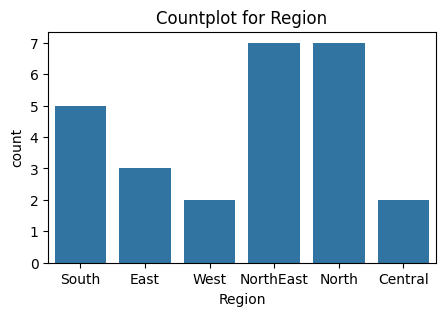

In [54]:
# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(5, 3)) # Set figure size (width, height)
sns.countplot(data=df, x="Region") # Plot Graph
plt.title("Countplot for Region") # Add Title
plt.show()


C:\Users\DEANESH\AppData\Local\Temp\ipykernel_9916\2833633403.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='TuitionFee4Years2025INR', hue='Region')


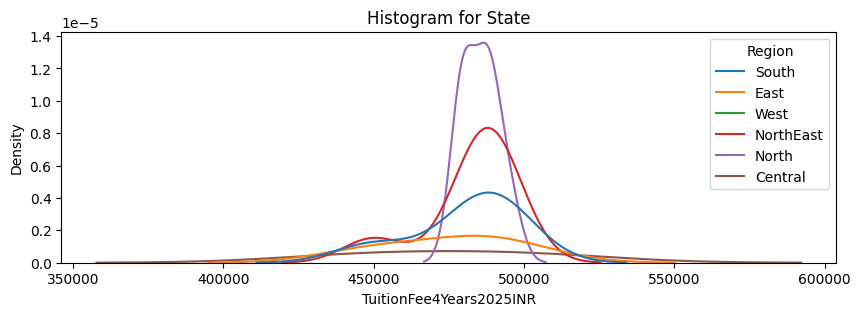

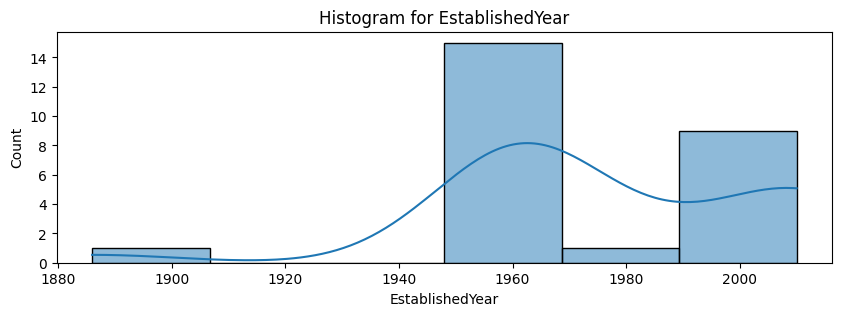

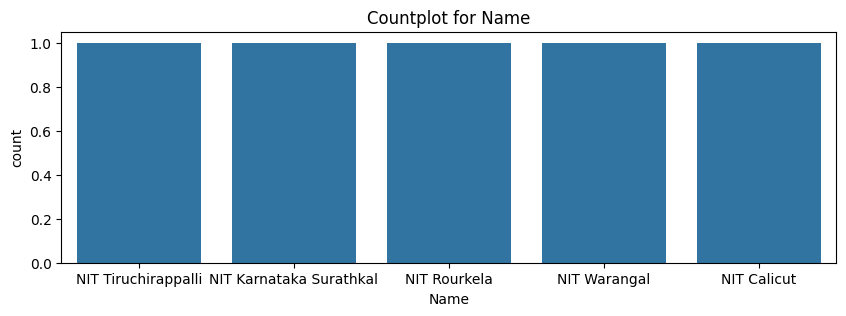

In [60]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()
plt.figure(figsize=(10,3))
sns.kdeplot(data=df, x='TuitionFee4Years2025INR', hue='Region')
plt.title('Histogram for State')
plt.show()

for col in con:
    plot_histogram(df, col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(5), col)
    break # Just breaking for one column

In [61]:
# Bivariate Analysis
    # Analyze two variables at a time
        # 1.continuous vs continuous -> scatterplot, regplot
        # 2.categorical vs continuous -> boxplot
        # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.show()

con, cat

(['EstablishedYear',
  'NIRF2024Rank',
  'TuitionFee4Years2025INR',
  'AvgPackageLPA',
  'MinCutoffRank2025',
  'MaxCutoffRank2025'],
 ['Name', 'State', 'Region'])

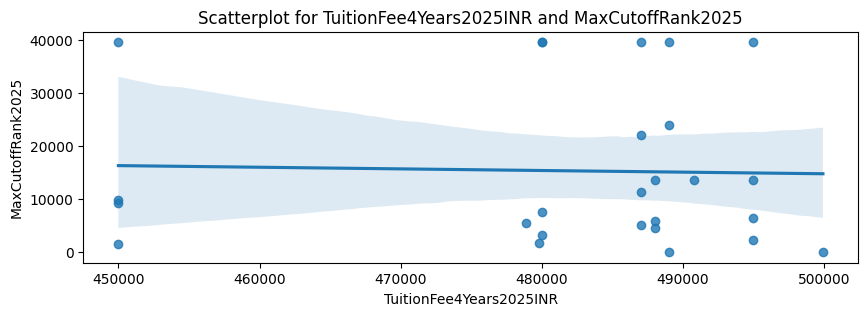

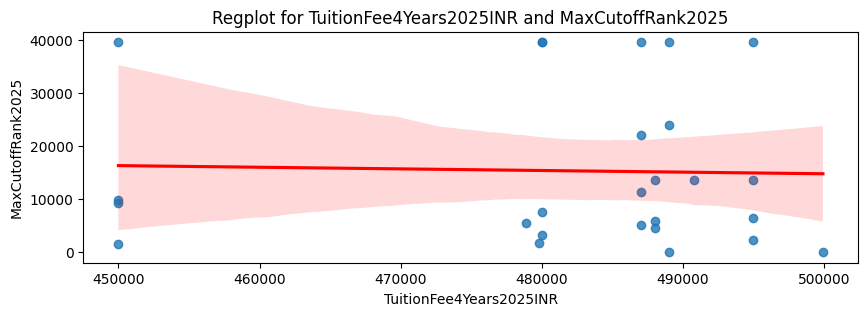

In [62]:
plot_scatter(df, 'TuitionFee4Years2025INR', 'MaxCutoffRank2025')
plot_reg(df, 'TuitionFee4Years2025INR', 'MaxCutoffRank2025')

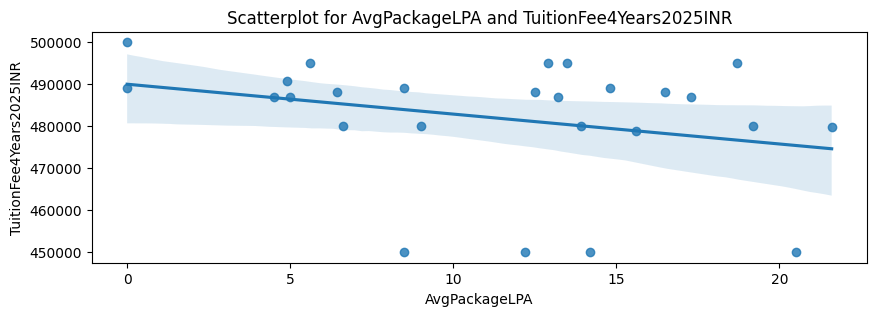

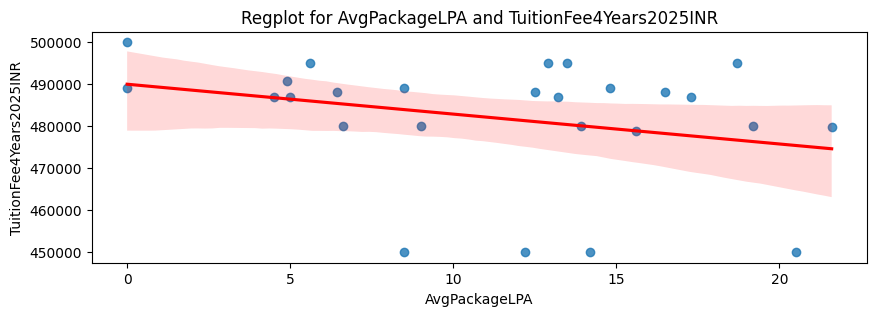

In [63]:
plot_scatter(df, 'AvgPackageLPA', 'TuitionFee4Years2025INR')
plot_reg(df, 'AvgPackageLPA', 'TuitionFee4Years2025INR')

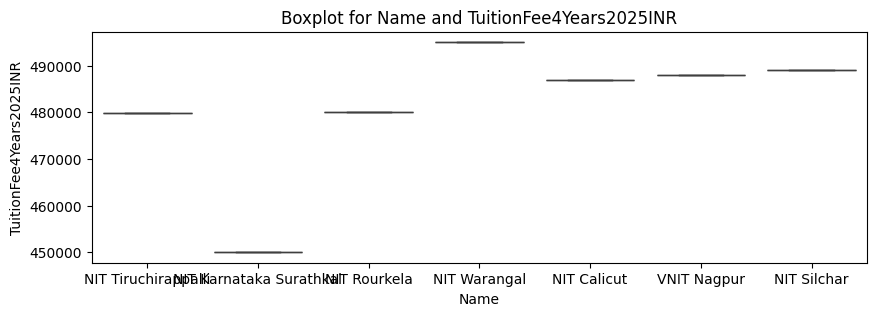

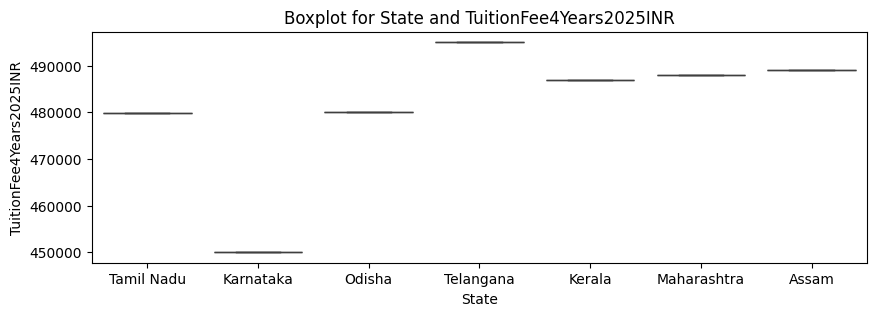

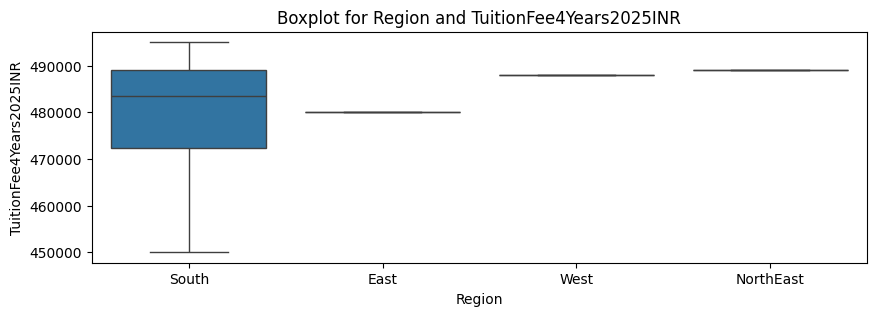

In [65]:
# 2. categorical vs continuous -> boxplot
plot_box(df.head(7), 'Name', 'TuitionFee4Years2025INR')
plot_box(df.head(7), 'State', 'TuitionFee4Years2025INR')
plot_box(df.head(7), 'Region', 'TuitionFee4Years2025INR')

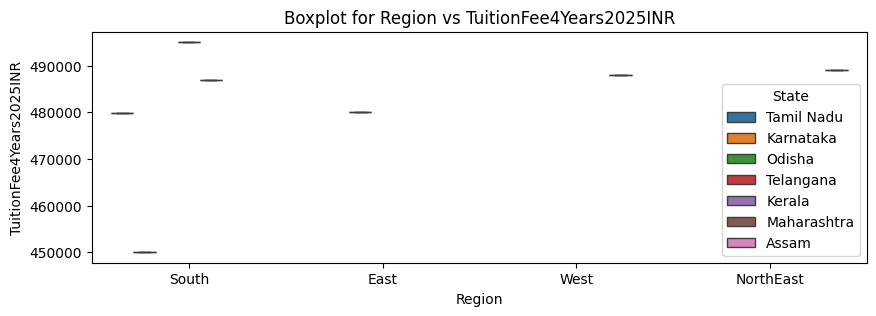

In [67]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df.head(7), x="Region", y="TuitionFee4Years2025INR", hue="State")
plt.title("Boxplot for Region vs TuitionFee4Years2025INR")
plt.show()

In [68]:
unique = df[cat].nunique()
unique

Name      26
State     26
Region     6
dtype: int64

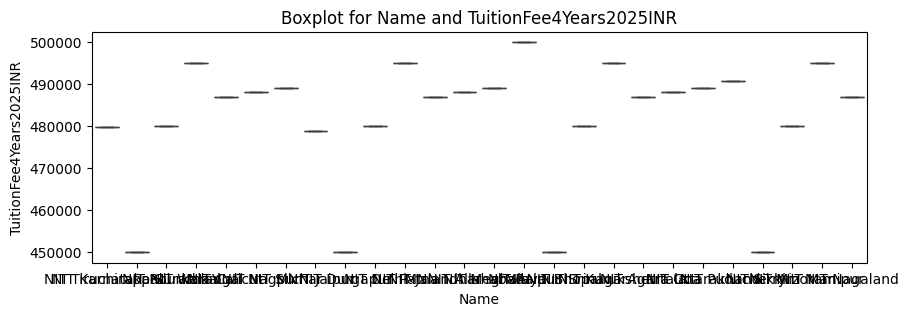

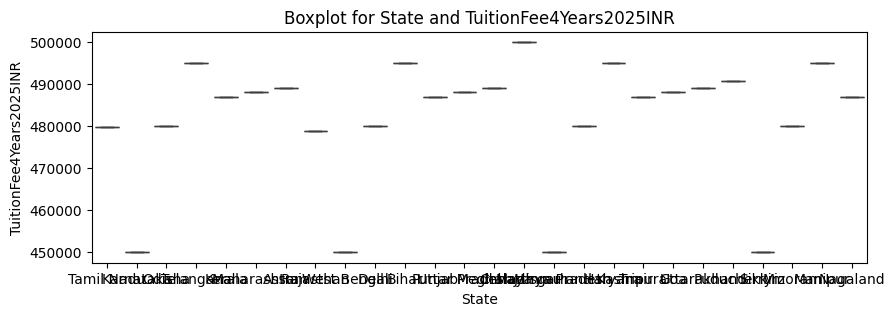

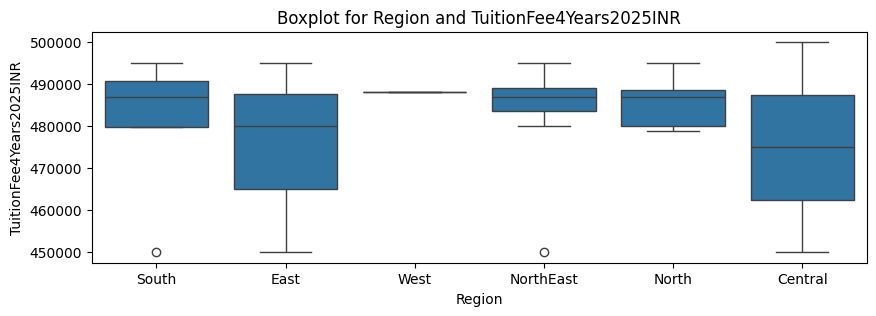

In [69]:
for col in cat:
    plot_box(df, col, 'TuitionFee4Years2025INR')

In [73]:
# 3. categorical vs categoric > Crosstab heatmap

def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

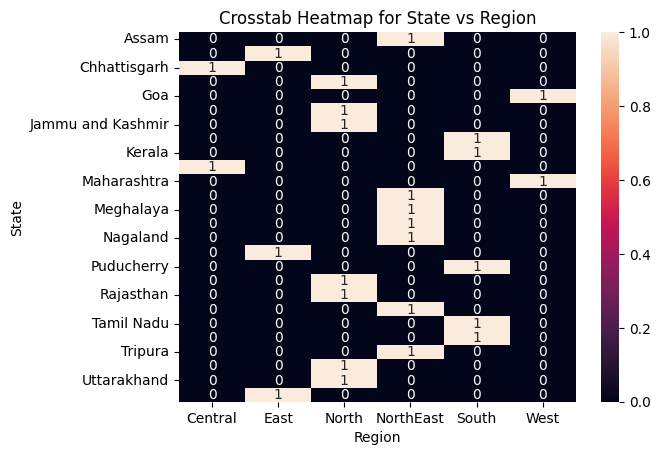

In [74]:
crosstab_heatmap(df, 'State', 'Region')

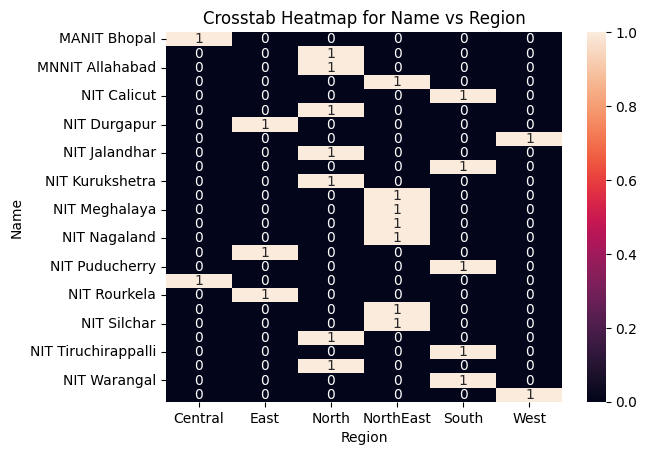

In [75]:
crosstab_heatmap(df, 'Name', 'Region')

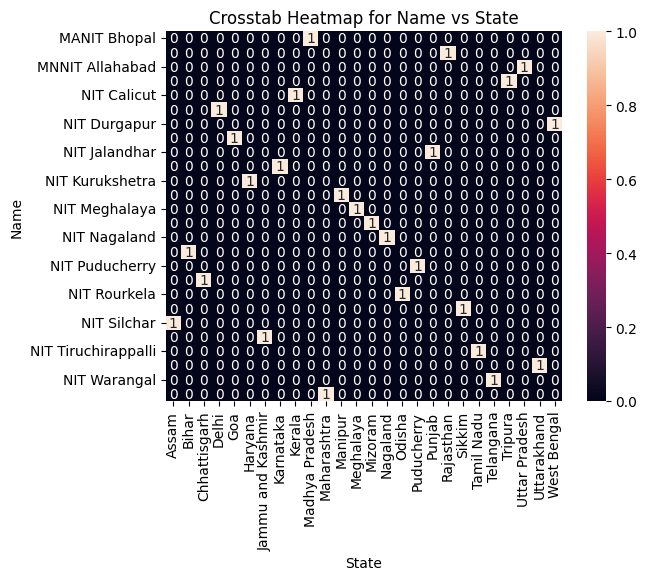

In [76]:
crosstab_heatmap(df, 'Name', 'State')

In [78]:
# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr

,EstablishedYear,NIRF2024Rank,TuitionFee4Years2025INR,AvgPackageLPA,MinCutoffRank2025,MaxCutoffRank2025
EstablishedYear,1.000000,-0.498524,-0.005962,-0.499185,0.370001,0.367124
NIRF2024Rank,-0.498524,1.000000,0.081861,0.061089,-0.185547,-0.160771
TuitionFee4Years2025INR,-0.005962,0.081861,1.000000,-0.287771,-0.022156,-0.031038
AvgPackageLPA,-0.499185,0.061089,-0.287771,1.000000,-0.387345,-0.381955
MinCutoffRank2025,0.370001,-0.185547,-0.022156,-0.387345,1.000000,0.995201
MaxCutoffRank2025,0.367124,-0.160771,-0.031038,-0.381955,0.995201,1.000000


In [79]:
corr.loc["TuitionFee4Years2025INR", "AvgPackageLPA"]

np.float64(-0.28777123802381405)

In [80]:
corr.loc["MaxCutoffRank2025", "AvgPackageLPA"]

np.float64(-0.38195482039773915)

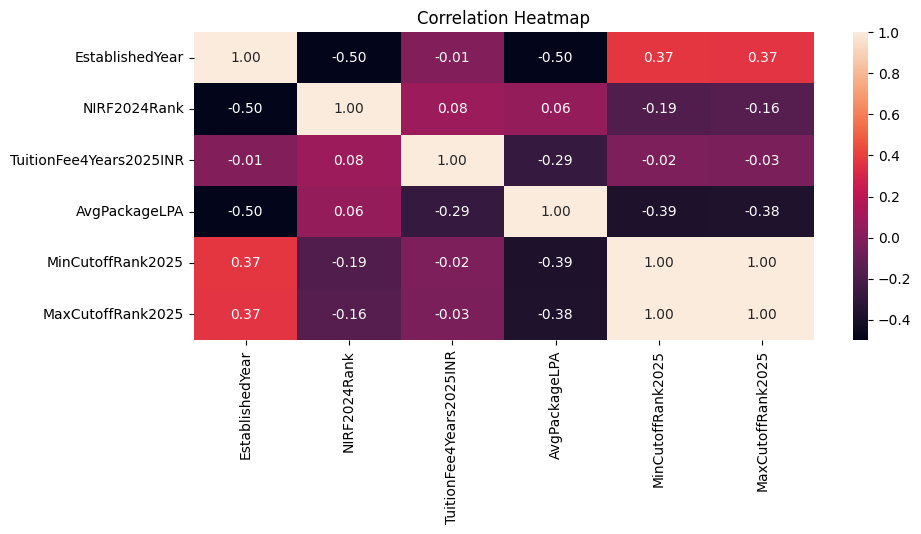

In [81]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

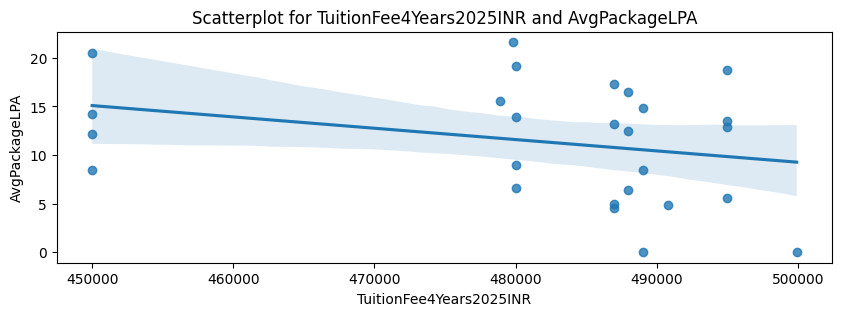

In [82]:
plot_scatter(df, x="TuitionFee4Years2025INR", y="AvgPackageLPA")

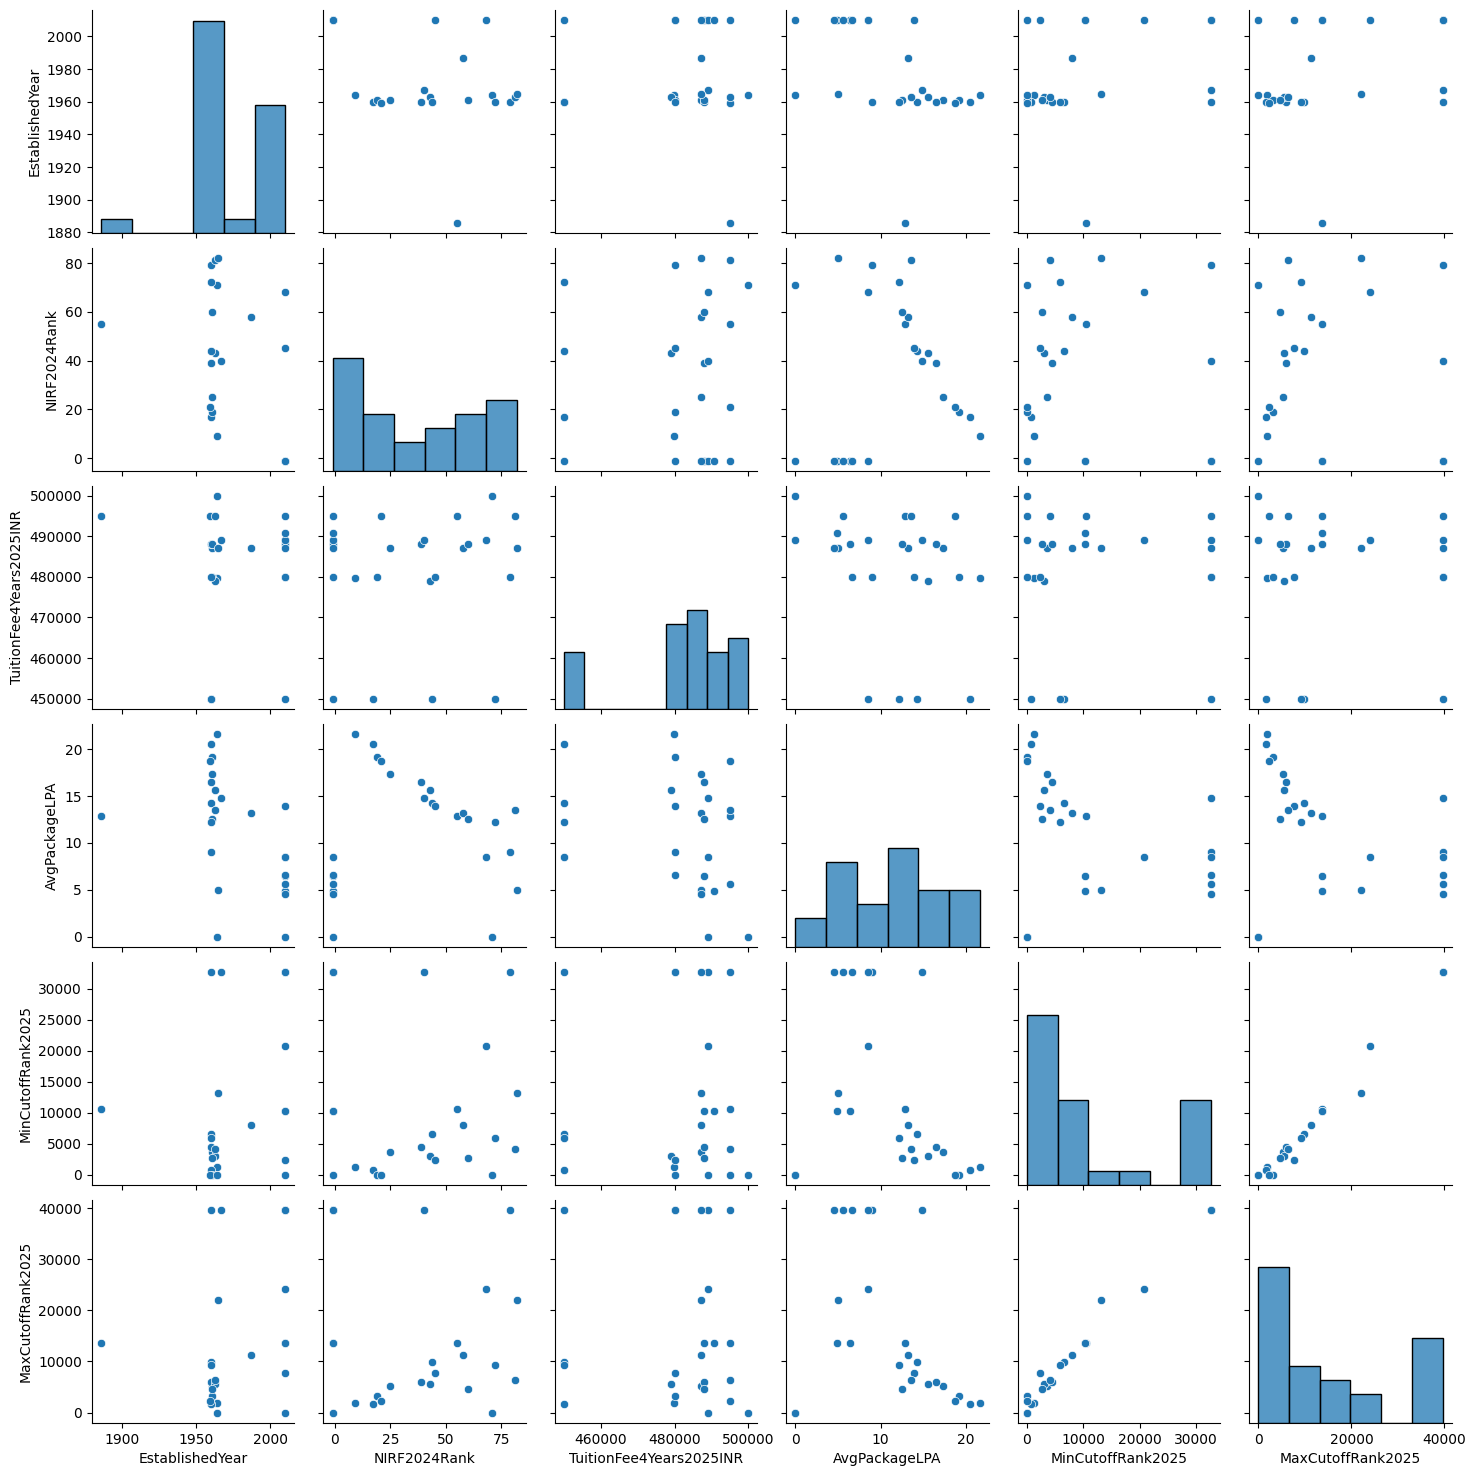

In [84]:
# Pair Plot

sns.pairplot(df[con])

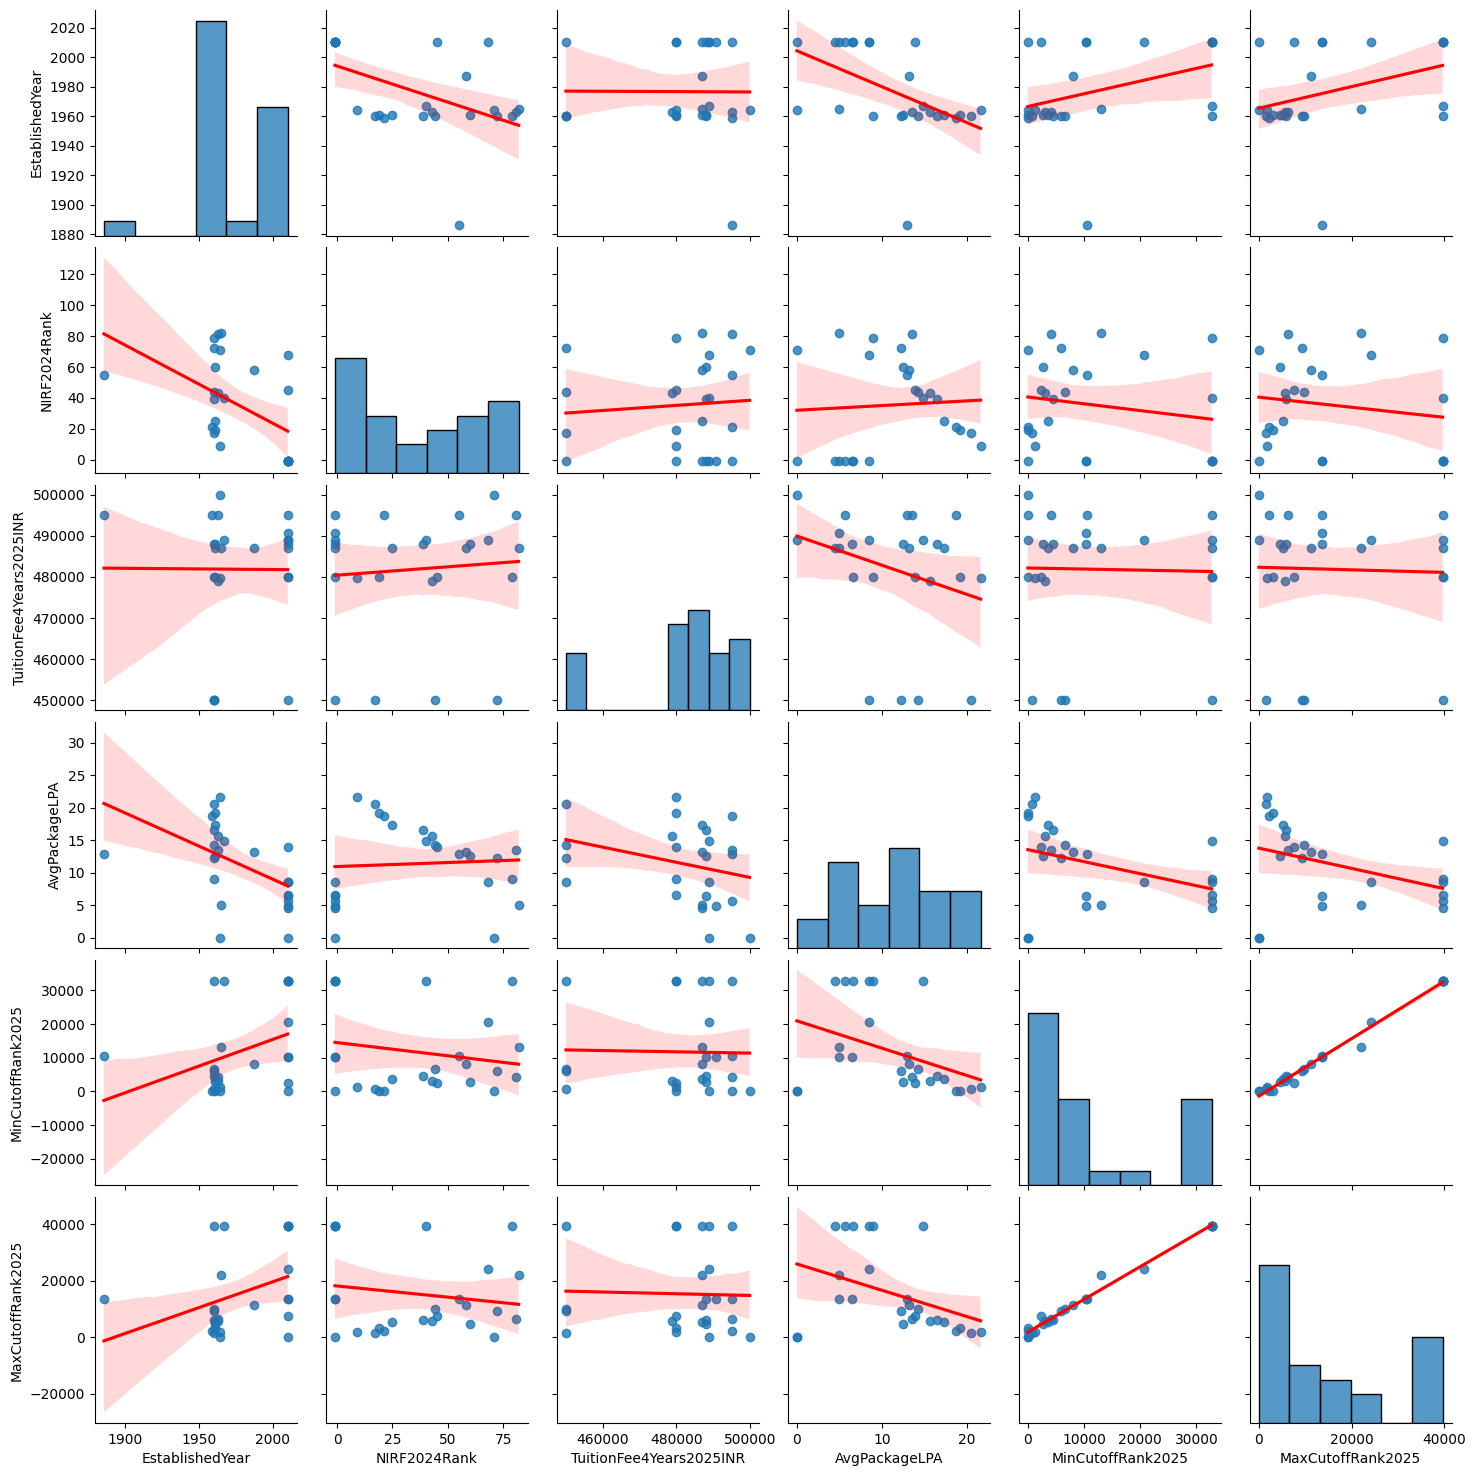

In [86]:
sns.pairplot(df[con], kind="reg", plot_kws = {"line_kws": {"color": "red"}})

In [87]:
# Extra questions

# 1. Show top 3 laptop Regions by AvgPackageLPA

top_3_laptop_regions = (
    df.groupby(by = "Region")
    .agg({"AvgPackageLPA":"median"})
    .nlargest(3, "AvgPackageLPA")
    .round(2)
)
top_3_laptop_regions

,AvgPackageLPA
Region,
South,18.7
East,14.2
North,13.2


In [89]:
# 2. Show bottom 3 State by TuitionFee4Years2025INR for Region = South
bottom_3_states = (
    df.query("Region == 'South'")
    .groupby("State")
    .agg({"TuitionFee4Years2025INR":"mean"})
    .nsmallest(3, "TuitionFee4Years2025INR")
    .round(2)    
)
bottom_3_states      

,TuitionFee4Years2025INR
State,
Karnataka,450000.0
Tamil Nadu,479800.0
Kerala,487000.0
